In [2]:
import fmEphys as fme
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

In [4]:
from scipy.stats import linregress

In [3]:
hffm_path = '/home/niell_lab/Data/freely_moving_ephys/batch_files/hffm_021423_figupdate.h5'
hffm = fme.read_group_h5(hffm_path)

In [30]:
# RC
x_in = hffm['FmLt_gazeshift_peakT'][hffm['Rc_responsive']==True][hffm['gazecluster']!='unresponsive'].copy().to_numpy()
y_in = hffm['rc_peakT'][hffm['Rc_responsive']==True][hffm['gazecluster']!='unresponsive'].copy().to_numpy()

In [86]:
# SN
x_in = hffm['FmLt_gazeshift_peakT'][hffm['Sn_responsive']==True][hffm['gazecluster']!='unresponsive'].copy().to_numpy()
y_in = hffm['sn_peakT'][hffm['Sn_responsive']==True][hffm['gazecluster']!='unresponsive'].copy().to_numpy()

(array([14., 13., 21., 43., 60., 61., 24., 10.,  6., 11.]),
 array([0.025 , 0.0474, 0.0698, 0.0922, 0.1146, 0.137 , 0.1594, 0.1818,
        0.2042, 0.2266, 0.249 ]),
 <BarContainer object of 10 artists>)

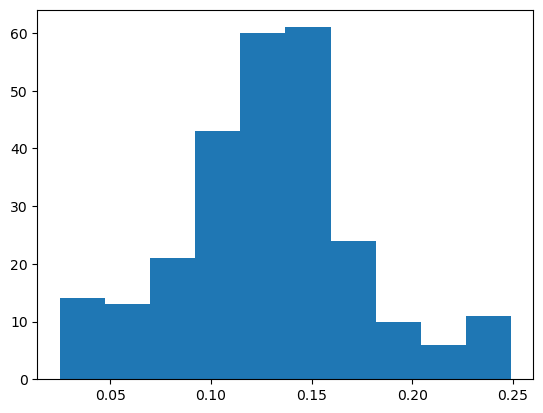

In [87]:
plt.hist(x_in)

In [88]:
use = np.array((x_in>0.025) & (x_in<0.2) & (y_in>0.025) & (y_in<0.2))

In [89]:
x_in = x_in[use]
y_in = y_in[use]

In [90]:
x = x_in[(~np.isnan(x_in)) * (~np.isnan(y_in))]
y = y_in[(~np.isnan(x_in)) * (~np.isnan(y_in))]
res = linregress(x, y)

In [91]:
res

LinregressResult(slope=0.4419217982732916, intercept=0.045125716020926625, rvalue=0.4582722066259896, pvalue=9.25577738864984e-14, stderr=0.05579249226778797, intercept_stderr=0.007033784150844173)

In [ ]:
def calc_latency(psth):
    # use norm PSTH
    ind = np.argmax(psth[1025:1250])+1025 # was 1000:1170
    peakT = psth_bins[ind]
    val = psth[ind]
    return peakT, val

for ind, row in hffm.iterrows():
    hffm.at[ind, 'sn_peakT1'] = 

413 44.000000000000924 46.00000000000093
415 145.0000000000009 180.00000000000105
456 205.00000000000097 249.000000000001


(0.02, 0.2)

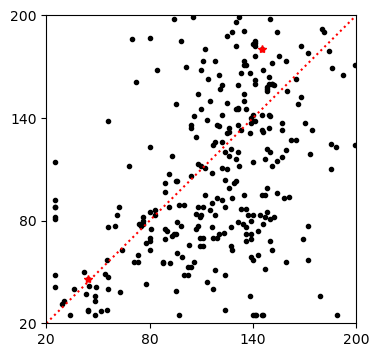

In [85]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
plt.plot(x, y, 'k.')
# plt.plot(np.linspace(0.02, 0.2, 100), np.linspace(0.02, 0.2, 100)*res.slope + res.intercept)
# plt.xlim([.02,.2])
# plt.ylim([.02,.2])
for ind in [413, 415, 456]:
    
    _x = hffm.loc[ind, 'FmLt_gazeshift_peakT']
    _y = hffm.loc[ind, 'rc_peakT']
    print(ind, _x*1000, _y*1000)
    plt.plot(_x, _y, 'r*')
ax.set_xticks(np.linspace(.02, 0.200, 4), labels=np.linspace(20, 200, 4).astype(int))
ax.set_yticks(np.linspace(.02, 0.200, 4), labels=np.linspace(20, 200, 4).astype(int))
plt.plot([0.02, 0.25], [0.02, 0.25], 'r:')
plt.xlim([.02,.2])
plt.ylim([.02,.2])

In [69]:
[col for col in hffm.columns if 'norm' in col]

['norm_waveform',
 'norm_ori_tuning_low',
 'norm_ori_tuning_mid',
 'norm_ori_tuning_high',
 'norm_Rc_psth',
 'norm_Sn_selective_on',
 'norm_Sn_background_on',
 'norm_Sn_selective_off',
 'norm_Sn_background_off',
 'norm_Sn_on_all_psth',
 'norm_gratings_psth',
 'norm_Sn_psth',
 'norm_mod_at_pref_peak',
 'norm_mod_for_Gt',
 'norm_mod_for_Rc',
 'norm_mod_for_Sn',
 'Gt_kde_psth_norm']

46.00000000000093
180.00000000000105
249.000000000001


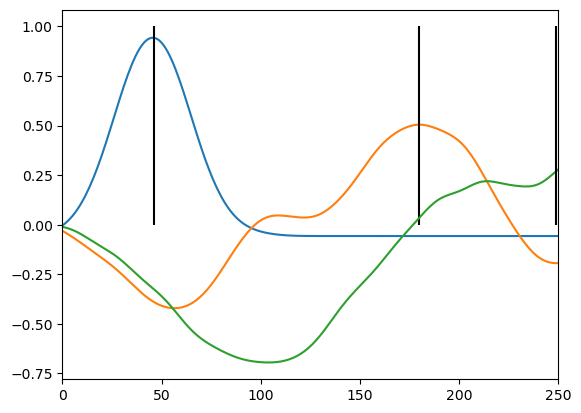

In [72]:
psth_bins = np.arange(-1000, 1001, 1)
for ind in [413, 415, 456]:
    _peak = hffm.loc[ind, 'rc_peakT']
    _psth = hffm.loc[ind, 'norm_Rc_psth']
    plt.plot(psth_bins, _psth)
    plt.vlines(_peak*1000, 0, 1, 'k')
    print(_peak*1000)
    plt.xlim([0, 250])

In [63]:
_peak

0.04400000000000093

In [ ]:
if row['Rc_responsive']==True:
row['FmLt_gazeshift_peakT'], row['rc_peakT']
if row['Sn_responsive']==True:
    axs[0,1].plot(row['FmLt_gazeshift_peakT'], row['sn_peakT'], '.', color=cat_cmap[row['gazecluster']], markersize=2)